# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### McCormick function 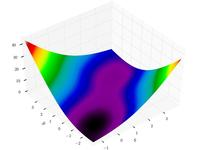

In [36]:
for ps in range(5,100,5):
    res = differential_evolution(McCormickF,bounds,seed=42, popsize=ps)
    print(f'popsize {ps}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')

popsize 5:
 min: -1.9132229549810233, min point: [-0.54719764 -1.54719764] in 10 operations

popsize 10:
 min: -1.9132229549810362, min point: [-0.54719755 -1.54719755] in 8 operations

popsize 15:
 min: -1.9132229549452981, min point: [-0.54719302 -1.547193  ] in 9 operations

popsize 20:
 min: -1.9132229549807014, min point: [-0.5471971  -1.54719712] in 8 operations

popsize 25:
 min: -1.9132229549808693, min point: [-0.54719784 -1.54719788] in 9 operations

popsize 30:
 min: -1.9132229549810358, min point: [-0.54719754 -1.54719754] in 10 operations

popsize 35:
 min: -1.9132229549805047, min point: [-0.547197   -1.54719699] in 10 operations

popsize 40:
 min: -1.9132229549809758, min point: [-0.54719738 -1.54719735] in 10 operations

popsize 45:
 min: -1.9132229549808746, min point: [-0.54719725 -1.54719724] in 10 operations

popsize 50:
 min: -1.9132229549803377, min point: [-0.54719691 -1.54719693] in 11 operations

popsize 55:
 min: -1.9132229549703905, min point: [-0.54719508 -1

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution

def McCormickF(x):
    return np.sin(x[0]+x[1]) + np.power(x[0]-x[1], 2) - 1.5*x[0]+2.5*x[1]+1

bounds = [(-1.5, 4), (-3, 4)]

strategies = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp',
              'best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']

for st in strategies:
    res = differential_evolution(McCormickF,bounds,seed=42, strategy=st)
    print(f'strategy {st}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')

strategy best1bin:
 min: -1.9132229549452981, min point: [-0.54719302 -1.547193  ] in 9 operations

strategy best1exp:
 min: -1.913222954981031, min point: [-0.54719749 -1.54719752] in 13 operations

strategy rand1exp:
 min: -1.9132229549484934, min point: [-0.54719322 -1.54719321] in 22 operations

strategy randtobest1exp:
 min: -1.9132229549737003, min point: [-0.5471955  -1.54719549] in 14 operations

strategy currenttobest1exp:
 min: -1.9132229549783242, min point: [-0.54719631 -1.54719629] in 19 operations

strategy best2exp:
 min: -1.9132229549795934, min point: [-0.54719665 -1.54719662] in 22 operations

strategy rand2exp:
 min: -1.913222954975533, min point: [-0.54719577 -1.54719577] in 27 operations

strategy randtobest1bin:
 min: -1.9132229549810358, min point: [-0.54719756 -1.54719753] in 10 operations

strategy currenttobest1bin:
 min: -1.9132229549810362, min point: [-0.54719756 -1.54719755] in 12 operations

strategy best2bin:
 min: -1.9132229549809119, min point: [-0.547

In [3]:
for t in np.arange(0.00,1,0.05):
    res = differential_evolution(McCormickF,bounds,seed=42, tol=t)
    print(f'relative tolerance {t}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')

relative tolerance 0.0:
 min: -1.9132229549810367, min point: [-0.54719755 -1.54719756] in 1000 operations

relative tolerance 0.05:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 7 operations

relative tolerance 0.1:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 7 operations

relative tolerance 0.15000000000000002:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

relative tolerance 0.2:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

relative tolerance 0.25:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

relative tolerance 0.30000000000000004:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

relative tolerance 0.35000000000000003:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

relative tolerance 0.4:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

relative t

In [4]:
for at in np.arange(0.00,1,0.05):
    res = differential_evolution(McCormickF,bounds,seed=42, atol=at)
    print(f'absolute tolerance {at}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')

absolute tolerance 0.0:
 min: -1.9132229549452981, min point: [-0.54719302 -1.547193  ] in 9 operations

absolute tolerance 0.05:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 7 operations

absolute tolerance 0.1:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 7 operations

absolute tolerance 0.15000000000000002:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 7 operations

absolute tolerance 0.2:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

absolute tolerance 0.25:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

absolute tolerance 0.30000000000000004:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

absolute tolerance 0.35000000000000003:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

absolute tolerance 0.4:
 min: -1.913222954946042, min point: [-0.54719283 -1.54719331] in 6 operations

absolute tole

In [5]:
mut = [1,1]
while mut[0] >= 0 and mut[1] <= 2:
    res = differential_evolution(McCormickF,bounds,seed=42, mutation=tuple(mut))
    print(f'mutation {tuple(mut)}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')
    mut[0] = mut[0] -0.1
    mut[1] = mut[1] + 0.1

mutation (1, 1):
 min: -1.913222954973575, min point: [-0.5471991  -1.54719995] in 14 operations

mutation (0.9, 1.1):
 min: -1.913222954980557, min point: [-0.54719812 -1.54719802] in 14 operations

mutation (0.8, 1.2000000000000002):
 min: -1.9132229549810273, min point: [-0.54719759 -1.54719764] in 12 operations

mutation (0.7000000000000001, 1.3000000000000003):
 min: -1.91322295498072, min point: [-0.54719797 -1.54719799] in 11 operations

mutation (0.6000000000000001, 1.4000000000000004):
 min: -1.9132229549810331, min point: [-0.54719759 -1.54719759] in 10 operations

mutation (0.5000000000000001, 1.5000000000000004):
 min: -1.913222954976772, min point: [-0.54719599 -1.54719598] in 13 operations

mutation (0.40000000000000013, 1.6000000000000005):
 min: -1.9132229549810345, min point: [-0.54719751 -1.54719752] in 15 operations

mutation (0.30000000000000016, 1.7000000000000006):
 min: -1.9132229549810291, min point: [-0.54719762 -1.54719761] in 11 operations

mutation (0.200000

In [6]:
for rc in np.arange(0.01,1,0.1):
    res = differential_evolution(McCormickF,bounds,seed=42, recombination = rc)
    print(f'recombination {rc}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')

recombination 0.01:
 min: -1.9132229549810367, min point: [-0.54719756 -1.54719755] in 213 operations

recombination 0.11:
 min: -1.9132229549767077, min point: [-0.54719599 -1.54719595] in 17 operations

recombination 0.21000000000000002:
 min: -1.9132229549810358, min point: [-0.54719756 -1.54719756] in 15 operations

recombination 0.31000000000000005:
 min: -1.9132229549800952, min point: [-0.54719683 -1.5471968 ] in 13 operations

recombination 0.41000000000000003:
 min: -1.9132229549808013, min point: [-0.54719718 -1.54719719] in 10 operations

recombination 0.51:
 min: -1.9132229549801107, min point: [-0.54719681 -1.54719683] in 12 operations

recombination 0.6100000000000001:
 min: -1.9132229549706343, min point: [-0.54719511 -1.54719509] in 9 operations

recombination 0.7100000000000001:
 min: -1.9132229549810291, min point: [-0.54719747 -1.54719752] in 8 operations

recombination 0.81:
 min: -1.913222954978174, min point: [-0.54719627 -1.54719626] in 7 operations

recombinatio

#### Вывод

Стратегий ограниченное кол-во и вероятно нужно подбирать под каждую ф-цию наиболее оптимальную. Разное кол-во итераций

Размер популяции не сильно влияет на количество итераций

Абсолютная и относительные толерантности обратно пропорциональны количеству итераций

Мутация значительно сокращает кол-во итераций чем она шире

Доля рекомбинаций обратно пропорциональна количеству итераций


Везде расхождение результатов незначительное

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

#### Ackley function 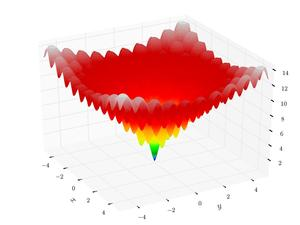

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = {}


strategies = ['best1bin','best1exp','rand1exp','randtobest1exp',
              'best2exp','rand2exp','randtobest1bin','best2bin','rand2bin','rand1bin']

upd = 'immediate' # эффективнее deferred с воркерами
m = (0,1.99)
rc = 1

for st in strategies:
    for ps in range(50,75,1):
        res = differential_evolution(ackley,bounds,seed=42,
                                    strategy=st, popsize=ps, mutation=m, recombination=rc, updating=upd)
        result[f'strategy={st}, popsize={ps}, mutation={m}, recombination={rc}, updating={upd}'] = res.nit


In [33]:
minval = min(result.values())

for key, value in result.items():
    if value == minval:
        print(key)

strategy=best2exp, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate
strategy=best2bin, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate


#### Вывод

Методом массовых циклов и выкручивания пропорциональных ключей в крайние положения было определено, что минимальное количество итераций, а именно 4, достигаются при следующих параметрах:

* strategy=best2bin, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate, iter=4
* strategy=best2exp, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate, iter=4
